In [11]:
#Import nessesary modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
# Read data

df = pd.read_csv(r'survey_results_public.csv')

In [13]:
# show first 4 raws

df.head(n=4)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [14]:
# Dimention (rows and columns) of the dataframe

df.shape

(83439, 48)

In [15]:
# Check the types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [16]:
# Check if there is any missing values in the dataframe

df.isna().sum()

# As we can see we have lots of missing values in our data, but we are not gonna drop or replace any of them

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [17]:
#Let's count number of "Gender"  answers; 

df['Gender'].value_counts() # we can include dropna=False to include missing values

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [18]:
# Create new variable to calculate percentage of answers in 'gender' population

gender_list = df['Gender'] # create gender series data
population = gender_list.size # count of raws
gender_count = gender_list.value_counts(dropna = False)
gender_count = dict(gender_count)


for key, value in gender_count.items():
    key = key
    value = (value / population * 100).round(2)
    
    print(key, value)
    
# As ecpected almost 90 percents of survey respondents are men and only 5 percent is a women

Man 89.67
Woman 4.94
Prefer not to say 1.73
nan 1.38
Non-binary, genderqueer, or gender non-conforming 0.83
Or, in your own words: 0.49
Man;Or, in your own words: 0.32
Man;Non-binary, genderqueer, or gender non-conforming 0.3
Woman;Non-binary, genderqueer, or gender non-conforming 0.18
Man;Woman 0.05
Non-binary, genderqueer, or gender non-conforming;Or, in your own words: 0.03
Man;Woman;Non-binary, genderqueer, or gender non-conforming 0.03
Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words: 0.02
Woman;Or, in your own words: 0.02
Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words: 0.01
Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words: 0.01
Man;Woman;Or, in your own words: 0.0


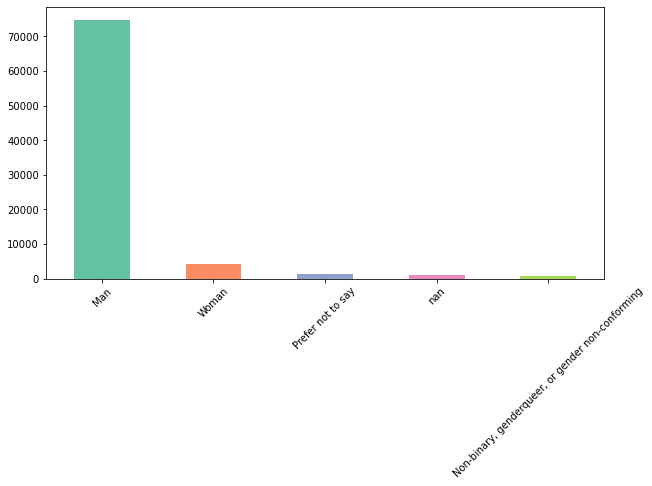

In [19]:
# Let's plot our gender column with most count of answers

plt.figure(figsize = (10, 5)) # we could pass figsize attribute in a plot function, we'll see that in our next plots

df['Gender'].value_counts(dropna = False).nlargest(n=5).plot(kind='bar', color = sns.color_palette("Set2"))

plt.xticks(rotation = 45)

plt.show()


In [20]:
# we can add arguments to value_counts function to see persentage of answers, where nan values are taken in consideration 

df['ToolsTechHaveWorkedWith'].value_counts(normalize = True, dropna = False)

Git                                                                      0.293867
Docker;Git                                                               0.150397
NaN                                                                      0.130658
Docker;Git;Kubernetes                                                    0.048898
Docker;Git;Yarn                                                          0.044943
                                                                           ...   
Deno;Docker;Flow;Unity 3D                                                0.000012
Docker;Kubernetes;Unity 3D;Unreal Engine;Yarn                            0.000012
Ansible;Git;Kubernetes;Unity 3D;Unreal Engine;Xamarin                    0.000012
Ansible;Chef;Docker;Flow;Git;Kubernetes;Puppet;Unity 3D;Unreal Engine    0.000012
Ansible;Flow;Kubernetes;Puppet                                           0.000012
Name: ToolsTechHaveWorkedWith, Length: 903, dtype: float64

<AxesSubplot:>

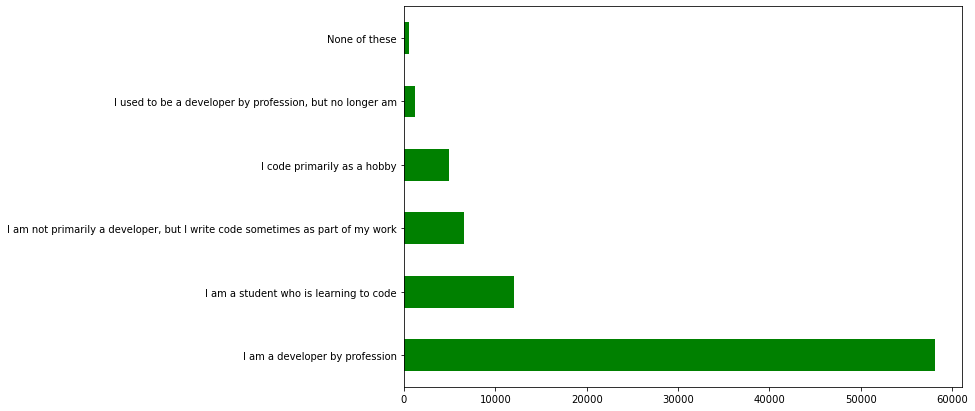

In [21]:
# Plot values by respondents' occupation

df['MainBranch'].value_counts().plot(kind='barh', figsize=(10,7), color='green')


<AxesSubplot:>

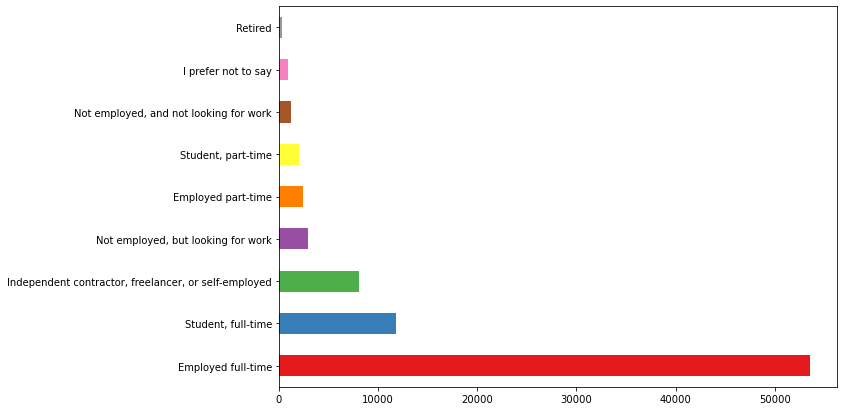

In [22]:
# Plot employment column to display their distribution

df['Employment'].value_counts().plot(kind='barh', figsize = (10,7), color=sns.color_palette('Set1'))


<AxesSubplot:>

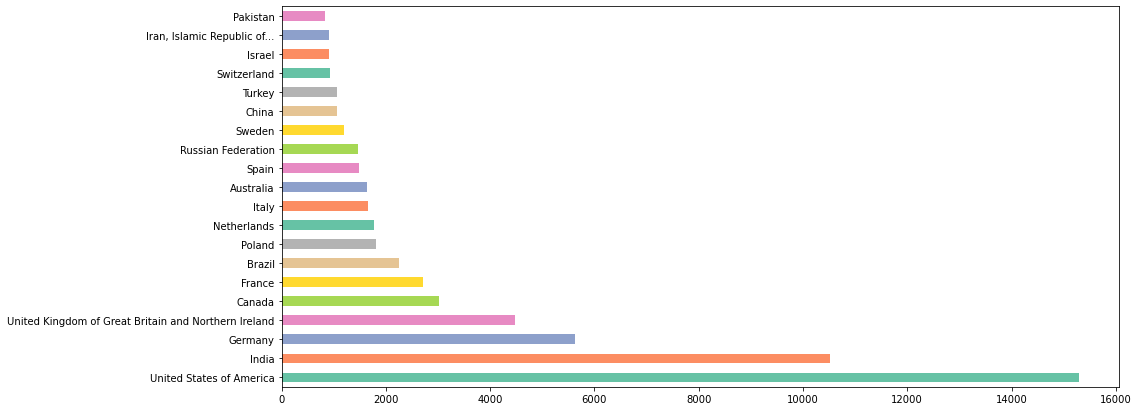

In [23]:
# Let's plot top countries having most number of 'developers'

df['Country'].value_counts().nlargest(20).plot(kind='barh', figsize=(15,7), color=sns.color_palette('Set2'))

In [24]:
# Here we create dataframe having filtered by the country of Georgia

df_georgia = df[df['Country'] == 'Georgia']  # df_georgia1 = df[df.Country == 'Georgia'] is the same
len(df_georgia) # number of survey respondents from georgia


161

In [25]:
# Count of occupation by given answers in the specific country

df_georgia['MainBranch'].value_counts()

I am a developer by profession                                                   110
I am a student who is learning to code                                            29
I am not primarily a developer, but I write code sometimes as part of my work     10
None of these                                                                      6
I code primarily as a hobby                                                        6
Name: MainBranch, dtype: int64

In [26]:
# Distribution of experience and ocupation

pd.crosstab(df_georgia.MainBranch, df_georgia.YearsCode, df_georgia.Country, aggfunc = 'count')
     

YearsCode,1,10,11,12,13,14,15,17,18,19,...,30,33,34,4,5,6,7,8,9,Less than 1 year
MainBranch,,,,,,,,,,,,,,,,,,,,,
I am a developer by profession,3.0,11.0,3.0,2.0,2.0,2.0,7.0,1.0,1.0,NaN,...,2.0,1.0,1.0,16.0,8.0,9.0,2.0,9.0,9.0,1.0
I am a student who is learning to code,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,1.0,NaN,2.0,NaN,NaN,9.0
"I am not primarily a developer, but I write code sometimes as part of my work",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
I code primarily as a hobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
None of these,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0


In [27]:
#create data where salary in given country is not zero or NULL 

df_salary = df_georgia[df_georgia['CompTotal'] > 0]

#replace non numeric values with int

df_salary = df_salary.replace(to_replace="Less than 1 year", value=0)

#convert yearscode column to int type

df_salary['YearsCode'] = df_salary['YearsCode'].astype(int) 

#check if it worked out

df_salary[df_salary['YearsCode'] == 0]


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
55858,55859,I am a developer by profession,Employed full-time,Georgia,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,0,...,18-24 years old,Man,No,Straight / Heterosexual,I don't know,I am blind / have difficulty seeing,None of the above,Too long,Easy,16956.0


In [28]:
# Calculate maximum of salary grouped by 'devtype' and 'years of coding'

pd.crosstab(df_salary.YearsCode, df_salary.DevType, df_salary.CompTotal, aggfunc = 'mean').sort_values(by='YearsCode', ascending=False)

# problem: could not figure out why .sort_values(ascending=False) not working, wanted it to apply to the 'yearscode' series
# update:
# problem solved as soon as we converted non numeric values to int in yearscode colomn



DevType,Academic researcher,Data scientist or machine learning specialist,Data scientist or machine learning specialist;Academic researcher;Educator,Data scientist or machine learning specialist;Academic researcher;Scientist,"Data scientist or machine learning specialist;Developer, back-end;Database administrator;Data or business analyst",Database administrator,DevOps specialist,"DevOps specialist;Engineer, site reliability","Developer, QA or test","Developer, back-end",...,"Developer, full-stack;Developer, back-end;Database administrator;DevOps specialist;Engineer, site reliability","Developer, mobile","Developer, mobile;Developer, desktop or enterprise applications","Developer, mobile;Developer, desktop or enterprise applications;Developer, back-end;Database administrator;Data or business analyst","Developer, mobile;Developer, desktop or enterprise applications;Developer, full-stack","Developer, mobile;Developer, desktop or enterprise applications;Developer, full-stack;Student","Developer, mobile;Developer, front-end","Developer, mobile;Developer, front-end;Developer, full-stack;Engineer, data;Developer, back-end;Database administrator;DevOps specialist;Engineer, site reliability","Engineer, data;Developer, back-end;DevOps specialist","Other (please specify):;Developer, back-end"
YearsCode,,,,,,,,,,,,,,,,,,,,,
30,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,...,NaN,8125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='DevType'>

C:\Users\givi.jalaghania\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\givi.jalaghania\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


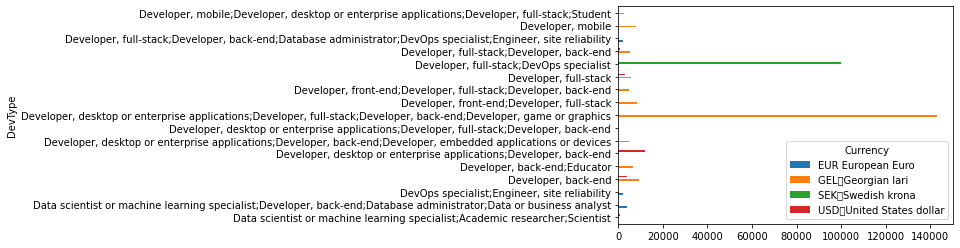

In [29]:
# Plot developers' salary where experience is from 10 to 15 years

df_salary['Currency3Sym'] = df_salary['Currency'].str[:3] # add new column

df_salary_with_years_range = df_salary[(df_salary['YearsCode'] >= 10) & (df_salary['YearsCode'] <= 15)] # variable for age gap

pd.crosstab(df_salary_with_years_range.DevType, df_salary_with_years_range.Currency, df_salary_with_years_range.CompTotal, aggfunc = 'mean').plot(kind='barh')


<AxesSubplot:ylabel='DevType'>

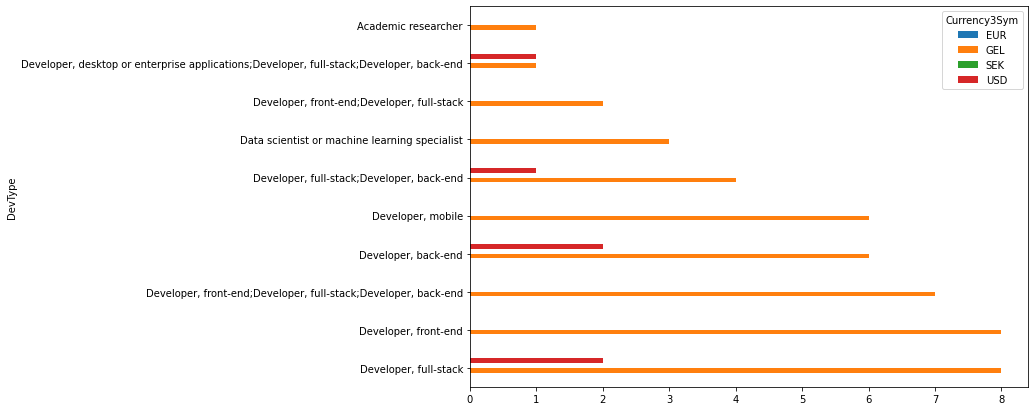

In [30]:
# let's display most currencies by 'devtype' that are paid to Georgians


pd.crosstab(df_salary.DevType, df_salary.Currency3Sym).nlargest(10, df_salary['Currency3Sym']).plot(kind='barh', figsize=(10, 7))

In [31]:
# 'developers' total salary in each 'yearscode' category for a period of month

df_salary.groupby(['YearsCode', 'DevType']).agg({'CompTotal' : 'sum'}).sort_values(by='CompTotal', ascending=False)

,,CompTotal
YearsCode,DevType,
13,"Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, game or graphics",143000.0
9,"Developer, mobile",132000.0
8,"Developer, desktop or enterprise applications;Developer, full-stack;Developer, game or graphics",117001.0
25,"Developer, full-stack",100000.0
10,"Developer, full-stack;DevOps specialist",100000.0
...,...,...
7,"Developer, full-stack",750.0
9,Database administrator,700.0
15,"Developer, full-stack;Developer, back-end",600.0


In [32]:
# programing languages in whole dataframe

df['LanguageHaveWorkedWith'].head(20)

0         C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                     JavaScript;Python
2                              Assembly;C;Python;R;Rust
3                                 JavaScript;TypeScript
4                        Bash/Shell;HTML/CSS;Python;SQL
5     C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;Powe...
6                                   HTML/CSS;JavaScript
7           HTML/CSS;JavaScript;PHP;Ruby;SQL;TypeScript
8                                   HTML/CSS;JavaScript
9                                            C++;Python
10                                        C#;TypeScript
11    Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...
12                                 C;C++;Java;Perl;Ruby
13                        C;C++;JavaScript;Python;R;SQL
14                                       JavaScript;SQL
15                                    Bash/Shell;Python
16                  C#;HTML/CSS;Java;JavaScript;Node.js
17          Bash/Shell;HTML/CSS;JavaScript;PHP;R

In [33]:
# Python's usage share in a whole dataframe

python_bool = df['LanguageHaveWorkedWith'].str.contains('Python')
python_bool.value_counts(normalize=True)

False    0.516835
True     0.483165
Name: LanguageHaveWorkedWith, dtype: float64

In [34]:
# Python's usage share in a Georgian 'devs'

df_georgia['LanguageHaveWorkedWith'].str.contains('Python').value_counts(normalize=True)


False    0.616883
True     0.383117
Name: LanguageHaveWorkedWith, dtype: float64

In [35]:
# What programing languages do Georgians use with specific occupation

df_datascience = df_georgia[df_georgia['DevType'] == 'Data scientist or machine learning specialist']
df_datascience['LanguageHaveWorkedWith']

3384        Matlab;Python
56037            Python;R
65024    Julia;Python;SQL
Name: LanguageHaveWorkedWith, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'JavaScript'),
  Text(1, 0, 'HTML/CSS'),
  Text(2, 0, 'Python'),
  Text(3, 0, 'SQL'),
  Text(4, 0, 'Java'),
  Text(5, 0, 'Node.js'),
  Text(6, 0, 'TypeScript'),
  Text(7, 0, 'C#'),
  Text(8, 0, 'Bash/Shell'),
  Text(9, 0, 'C++'),
  Text(10, 0, 'PHP'),
  Text(11, 0, 'C'),
  Text(12, 0, 'PowerShell'),
  Text(13, 0, 'Go'),
  Text(14, 0, 'Kotlin'),
  Text(15, 0, 'Rust'),
  Text(16, 0, 'Ruby'),
  Text(17, 0, 'Dart'),
  Text(18, 0, 'Assembly'),
  Text(19, 0, 'Swift'),
  Text(20, 0, 'R'),
  Text(21, 0, 'VBA'),
  Text(22, 0, 'Matlab'),
  Text(23, 0, 'Groovy'),
  Text(24, 0, 'Objective-C'),
  Text(25, 0, 'Scala'),
  Text(26, 0, 'Perl'),
  Text(27, 0, 'Haskell'),
  Text(28, 0, 'Delphi'),
  Text(29, 0, 'Clojure'),
  Text(30, 0, 'Elixir'),
  Text(31, 0, 'LISP'),
  Text(32, 0, 'Julia'),
  Text(33, 0, 'F#'),
  T

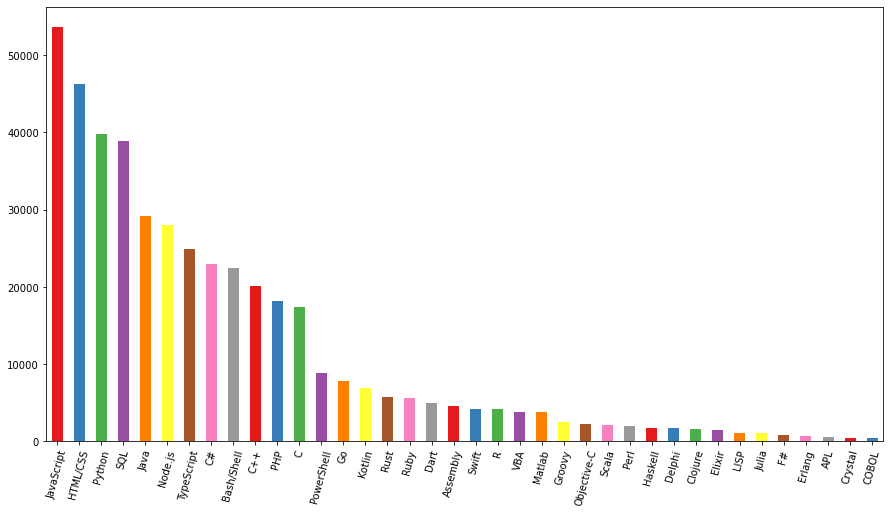

In [36]:
# what are the most used programing languages in a whole dataset

lang_df = df['LanguageHaveWorkedWith'].str.split(';', expand = True)

lang_df.stack().value_counts().plot(kind='bar', figsize=(15,8), color=sns.color_palette('Set1'))

plt.xticks(rotation=75)


In [41]:
# Statistics about salary in Georgia

df_monthly_salary = df_salary[df_salary['CompFreq'] == 'Monthly'] 
df_grouped_withmonthly = df_monthly_salary.groupby(['DevType', 'Country']).agg({'CompTotal' : ['min', 'max', 'mean', 'count']}).round()
df_grouped_withmonthly.columns = ['min salary', 'max salary', 'mean salary', 'count']
df_grouped_withmonthly.reset_index().sort_values(by='count', ascending=False)

,DevType,Country,min salary,max salary,mean salary,count
25,"Developer, full-stack",Georgia,750.0,6500.0,3394.0,9
6,"Developer, back-end",Georgia,1000.0,11000.0,4906.0,8
17,"Developer, front-end",Georgia,400.0,5000.0,2350.0,8
20,"Developer, front-end;Developer, full-stack;Dev...",Georgia,2500.0,6250.0,4664.0,7
28,"Developer, full-stack;Developer, back-end",Georgia,600.0,18000.0,6820.0,5
30,"Developer, mobile",Georgia,800.0,132000.0,29435.0,5
1,Data scientist or machine learning specialist,Georgia,1000.0,5000.0,2833.0,3
19,"Developer, front-end;Developer, full-stack",Georgia,4500.0,12000.0,8250.0,2
34,"Developer, mobile;Developer, desktop or enterp...",Georgia,2500.0,2500.0,2500.0,1
33,"Developer, mobile;Developer, desktop or enterp...",Georgia,10000.0,10000.0,10000.0,1


In [38]:
# Number of respondents in each age gap

data_for_plot = df_georgia['Age'].value_counts()
data_for_plot

18-24 years old       66
25-34 years old       60
35-44 years old       16
Under 18 years old    11
55-64 years old        3
45-54 years old        3
Prefer not to say      1
Name: Age, dtype: int64

In [39]:
# Define variable for parameters

age_gaps = df_georgia['Age'].unique().tolist() 

age_gaps.pop(3)


# Define data to plot

lst = data_for_plot.values.tolist()


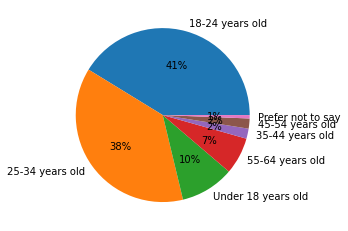

In [40]:
# Plot number of people in each gap

x = np.array(lst)

labels = age_gaps

plt.pie(x, labels = labels, autopct = '%.0f%%')
plt.show()





